In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
class Point:
    def __init__(self, 
                 x_pos:float=None, 
                 y_pos:float=None, 
                 is_border:bool=False, 
                 is_airfoil:bool=False, 
                 U_infinity:float=30):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.is_border = is_border
        self.is_airfoil = is_airfoil
        self.U_infinity = U_infinity
        self.streamline = 0
        self.del_streamline_del_x_value = 0
        self.del_streamline_del_y_value = 0
        #self.del_2_streamline_del_x_value = 0
        #self.del_2_streamline_del_y_value = 0
        
    def set_streamline(self, streamline):
        if self.is_airfoil:
            streamline = 0
        self.streamline = streamline
        
    def get_del_streamline_del_x(self):
        if self.is_border or self.is_airfoil:
            return 0
        return self.del_streamline_del_x_value
    
    def set_del_streamline_del_x(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_x_value = stream_line
    
    def get_del_streamline_del_y(self):
        if self.is_border:
            return self.U_infinity
        elif self.is_airfoil:
            return 0
        return self.del_streamline_del_y_value
    
    def set_del_streamline_del_y(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_y_value = stream_line
            
    
            
p = Point()


max error:  1.0
iteration:  1

max error:  1.0000059709675932
iteration:  2

max error:  1.0000338462238154
iteration:  3

max error:  1.0001244324260898
iteration:  4

max error:  1.000347474108215
iteration:  5

max error:  1.00083003875752
iteration:  6

max error:  1.0017906613579521
iteration:  7

max error:  1.0035907472611467
iteration:  8

max error:  1.0068170920598694
iteration:  9

max error:  1.0124101507096552
iteration:  10

max error:  1.0218762423257124
iteration:  11

max error:  1.0376612834200447
iteration:  12

max error:  1.0638561411200465
iteration:  13

max error:  1.282885619035523
iteration:  14

max error:  12.15175898310845
iteration:  15

max error:  6.252834348576301
iteration:  16

max error:  5.872033177866631
iteration:  17

max error:  14.2958638956601
iteration:  18

max error:  8.165131985929488
iteration:  19

max error:  311.5689679943293
iteration:  20

max error:  234.02444810656056
iteration:  21

max error:  191.44051521239786
iteration:  22



C:\Users\guilh\AppData\Local\Temp\ipykernel_16048\2913468787.py:70: UserWarning: The following kwargs were not used by contour: 'interpolation'
  plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,


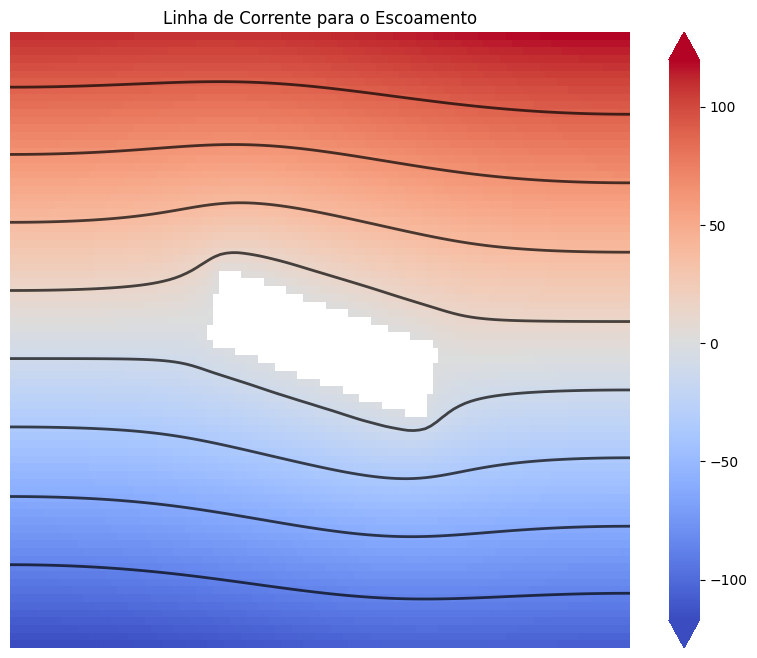

In [39]:
class Mesh:
    def __init__(self, delta:float = 0.01, rotation_angle:float=0, U_infinity:float=30):
        self.delta = delta
        self.lambda_value = 1.85
        self.tolerance = 0.01
        self.rotation_angle = rotation_angle*np.pi/180
        self.U_infinity = U_infinity
        self._preprocess()
    
    def _preprocess(self):
        mesh_width = 11
        mesh_heigth = 8
        airfoil_width = 1
        airfoil_height = 4
        self.num_of_iterations = 0
        self.rotation_matrix = np.array([[-np.sin(self.rotation_angle), np.cos(self.rotation_angle)],
                                         [-np.cos(self.rotation_angle), -np.sin(self.rotation_angle)]])
        
        airfoil_center = np.array([mesh_width/2, mesh_heigth/2])
        new_system_center = self.rotation_matrix@airfoil_center        
        self.p1 = new_system_center + np.array([airfoil_width/2, airfoil_height/2]) 
        self.p2 = new_system_center + np.array([-airfoil_width/2, -airfoil_height/2]) 
        
        self.num_of_cols = int(mesh_width/self.delta)    
        self.num_of_rows = int(mesh_heigth/self.delta)    
        self.mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for c in range(self.num_of_cols):
            for r in range(self.num_of_rows):
                new_x = self.delta * c
                new_y = self.delta * r
                new_point = Point(x_pos = new_x, y_pos = new_y)
                is_airfoil = self.is_in_airfoil(new_point)
                new_point.is_airfoil = is_airfoil
                if(r == 0 or c == 0) or (r == (self.num_of_rows-1) or c == (self.num_of_cols-1)):
                    new_point.is_border = True
                self.mesh[r][c] = new_point
        
        
    def is_in_airfoil(self, point):
        x_pos = point.x_pos
        y_pos = point.y_pos
        position_in_new_system = self.rotation_matrix@np.array([x_pos, y_pos])
        new_x, new_y = position_in_new_system[0], position_in_new_system[1]
        in_x = (self.p1[0]>new_x and self.p2[0]<new_x)
        in_y = (self.p1[1]>new_y and self.p2[1]<new_y)
        if in_x and in_y:
            return True
        return False
    
    def plot_mesh(self): 
        mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for c in range(self.num_of_cols):
            for r in range(self.num_of_rows):
                point = self.mesh[r][c]
                mesh[r][c] = not point.is_airfoil
        plt.imshow(mesh, cmap='gray', interpolation='nearest')
        plt.title('Posição do Aerofólio')
        plt.axis('off')
        plt.show()
    
    def plot_streamline(self):
        mesh_values = self.get_mesh_values()  
        mesh_values = np.array(mesh_values)
        mask = np.zeros_like(mesh_values, dtype=bool)
        mask[mesh_values == 0] = True
        plt.figure(figsize=(10, 8))
        sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=mask, cbar_kws={'extend': 'both'})
        nonzero_values = mesh_values[mesh_values != 0]
        levels = np.percentile(nonzero_values, np.linspace(0, 100, num=10))  
        plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,
                    interpolation='bilinear', extent=(0, mesh_values.shape[1], 0, mesh_values.shape[0]))
        plt.title('Linha de Corrente para o Escoamento')
        plt.axis('off')
        plt.show() 
        

        
    def get_mesh_values(self):  
        mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for row_id in range(self.num_of_rows): 
            for col_id in range(self.num_of_cols):   
                mesh[row_id][col_id] = self.mesh[row_id][col_id].streamline
        return mesh
        
    def apply_overelaxing(self, old_value, calculated_value):
        new_value = self.lambda_value*calculated_value + (1-self.lambda_value)*old_value
        try:
            error = np.absolute((new_value-old_value)/new_value)
        except:
            return 0, 0
        return new_value, error
    
    def calculate_point_is_border(self, row_id, col_id):
        calculated_value = 0
        center_point = self.mesh[row_id][col_id]
        if row_id == 0:
            upper_point = None
        else: 
            upper_point = self.mesh[row_id-1][col_id]
        if row_id == (self.num_of_rows-1):
            lower_point = None
        else:
            lower_point = self.mesh[row_id+1][col_id]
            
        if col_id == 0:
            left_point = None
        else:
            left_point = self.mesh[row_id][col_id-1]
        if col_id == (self.num_of_cols-1):
            right_point = None
        else:
            right_point = self.mesh[row_id][col_id+1]
            
        if upper_point is None:
            if left_point is None: 
                calculated_value = (2*right_point.streamline + 
                                    2*lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4

            elif right_point is None: 
                calculated_value = (2*left_point.streamline + 
                                    2*lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4
                
            else:
                calculated_value = (left_point.streamline +
                                    right_point.streamline +
                                    2*lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4
        elif lower_point is None:
            if left_point is None: 
                calculated_value = (2*right_point.streamline + 
                                    2*upper_point.streamline 
                                    -2*self.delta*self.U_infinity)/4
            elif right_point is None: 
                calculated_value = (2*left_point.streamline + 
                                    2*upper_point.streamline
                                    -2*self.delta*self.U_infinity)/4
            else:
                calculated_value = (left_point.streamline +
                                    right_point.streamline +
                                    2*upper_point.streamline
                                    -2*self.delta*self.U_infinity)/4
        elif left_point is None and ((upper_point is not None) and (lower_point is not None)):
            calculated_value = (2*right_point.streamline 
                                +lower_point.streamline 
                                + upper_point.streamline)/4
        elif right_point is None and ((upper_point is not None) and (lower_point is not None)):
            calculated_value = (2*left_point.streamline 
                                +lower_point.streamline 
                                + upper_point.streamline)/4
        
        return calculated_value
    
    def iter(self, row_id, col_id):
        center_point = self.mesh[row_id][col_id]
        old_streamline_value = center_point.streamline
        #print(center_point.is_border, center_point.is_airfoil)
        if center_point.is_airfoil: 
            return 0
        elif center_point.is_border:
            calculated_streamline_value = self.calculate_point_is_border(row_id, col_id)
        
        else:
            upper_point = self.mesh[row_id-1][col_id]
            lower_point = self.mesh[row_id+1][col_id]
            left_point = self.mesh[row_id][col_id-1]
            right_point = self.mesh[row_id][col_id+1]
            
            calculated_streamline_value = (upper_point.streamline + 
                                left_point.streamline + 
                                lower_point.streamline + 
                                right_point.streamline)/4
            #print('c',calculated_streamline_value)
        new_streamline_value, error = self.apply_overelaxing(
                        old_streamline_value,calculated_streamline_value)
        (self.mesh[row_id][col_id]).set_streamline(new_streamline_value)
        
        return error
            
        
    def simul(self):
        max_error = np.inf
        num_of_cols = len(self.mesh[0])    
        num_of_rows = len(self.mesh)   
        while((max_error > self.tolerance) or (self.num_of_iterations>10000)): 
            temp_error = 0
                
            for row_id in range(num_of_rows): 
                for col_id in range(num_of_cols):   
                    
                    #print('\n',row_id,col_id)
                    error = self.iter(row_id,col_id)
                    if error > temp_error:
                        temp_error = error
                    #print((self.mesh[row_id][col_id]).streamline, error)
            self.num_of_iterations+=1
            max_error = temp_error
            print('\nmax error: ', max_error)
            print('iteration: ', self.num_of_iterations)
        
        
        
    

        
        
        
        
        
m = Mesh(rotation_angle=15, delta = 0.1)
mesh = m.mesh
#m.plot_mesh()
m.simul()
m.plot_streamline()


C:\Users\guilh\AppData\Local\Temp\ipykernel_16048\3923492139.py:10: UserWarning: The following kwargs were not used by contour: 'interpolation'
  plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,


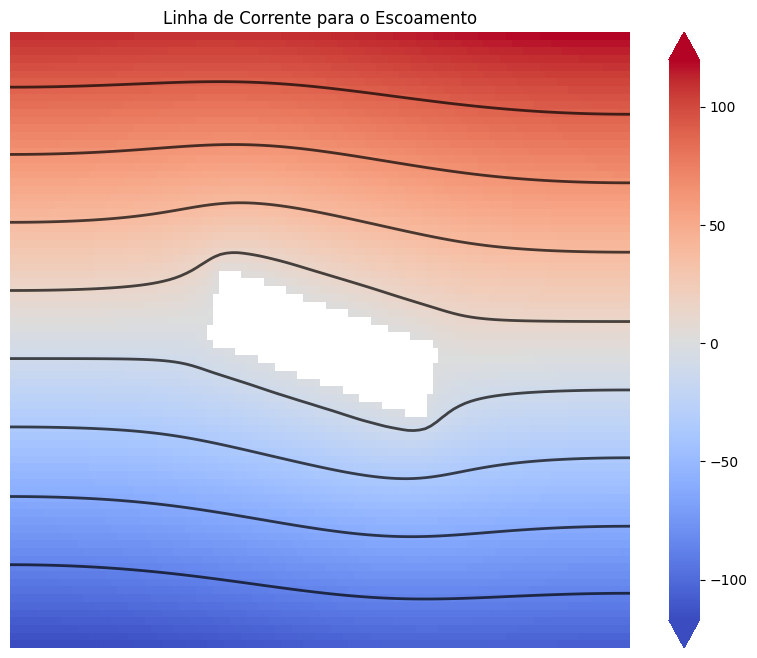

In [38]:
def plot_streamline(self):
        mesh_values = self.get_mesh_values()  
        mesh_values = np.array(mesh_values)
        mask = np.zeros_like(mesh_values, dtype=bool)
        mask[mesh_values == 0] = True
        plt.figure(figsize=(10, 8))
        sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=mask, cbar_kws={'extend': 'both'})
        nonzero_values = mesh_values[mesh_values != 0]
        levels = np.percentile(nonzero_values, np.linspace(0, 100, num=10))  
        plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,
                    interpolation='bilinear', extent=(0, mesh_values.shape[1], 0, mesh_values.shape[0]))
        plt.title('Linha de Corrente para o Escoamento')
        plt.axis('off')
        plt.show() 
        

def plot_streamline0(self):
    mesh_values = self.get_mesh_values()  # Supondo que esta função retorna uma matriz de valores

    # Plotar o heatmap apenas para valores diferentes de zero
    plt.figure(figsize=(10, 8))
    sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=(mesh_values == 0), cbar_kws={'extend': 'both'})

    # Determinar os níveis de contorno com base nos valores não zero
    levels = np.unique(mesh_values[mesh_values != 0])  # Apenas os valores diferentes de zero
    levels.sort()  # Ordenar os níveis de contorno

    # Adicionar linhas de contorno apenas nos valores não zero
    plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid')

    plt.title('Linha de Corrente para o Escoamento')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.show()



plot_streamline(m)

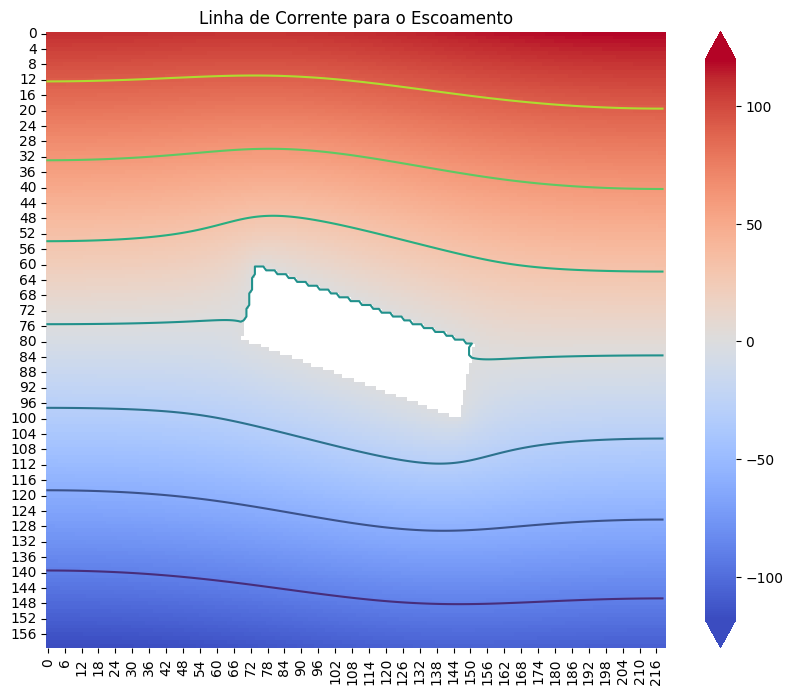

In [24]:
def plot_streamline(self):
    mesh_values = self.get_mesh_values()  
    mesh_values = np.array(mesh_values)
    mask = np.zeros_like(mesh_values, dtype=bool)
    mask[mesh_values == 0] = True
    plt.figure(figsize=(10, 8))
    sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=mask, cbar_kws={'extend': 'both'})
    plt.contour(mesh_values)
    plt.title('Linha de Corrente para o Escoamento')  # Título do gráfico
    plt.show() 
    
plot_streamline(m)

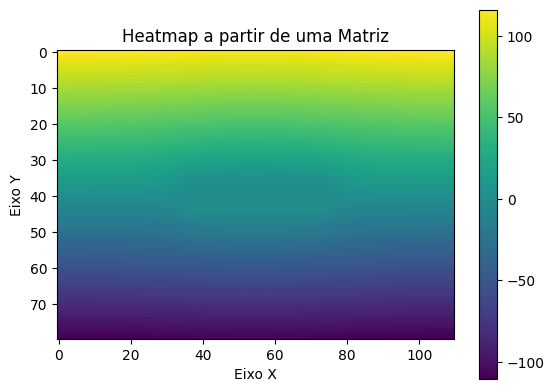

In [25]:
# Plotar o heatmap
plt.imshow(val, interpolation='nearest')

# Adicionar barra de cores
plt.colorbar()

# Adicionar título e rótulos dos eixos
plt.title('Heatmap a partir de uma Matriz')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Mostrar o heatmap
plt.show()



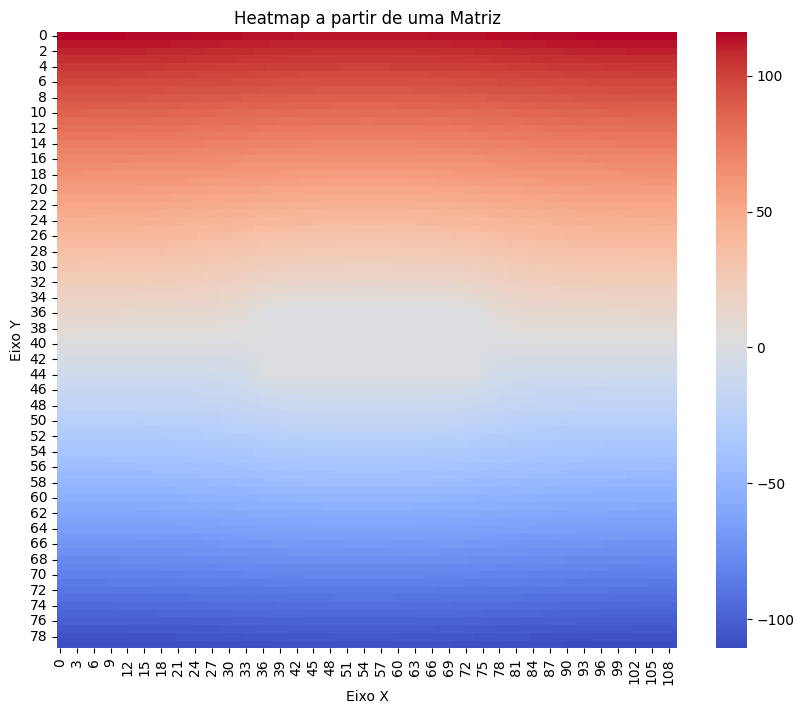

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Criando uma matriz de exemplo
data = np.random.rand(10, 12)

# Plotando o heatmap usando Seaborn
plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura
sns.heatmap(val, annot=False, cmap='coolwarm', linewidths=0)
#plt.imshow(val)
plt.title('Heatmap a partir de uma Matriz')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.show()


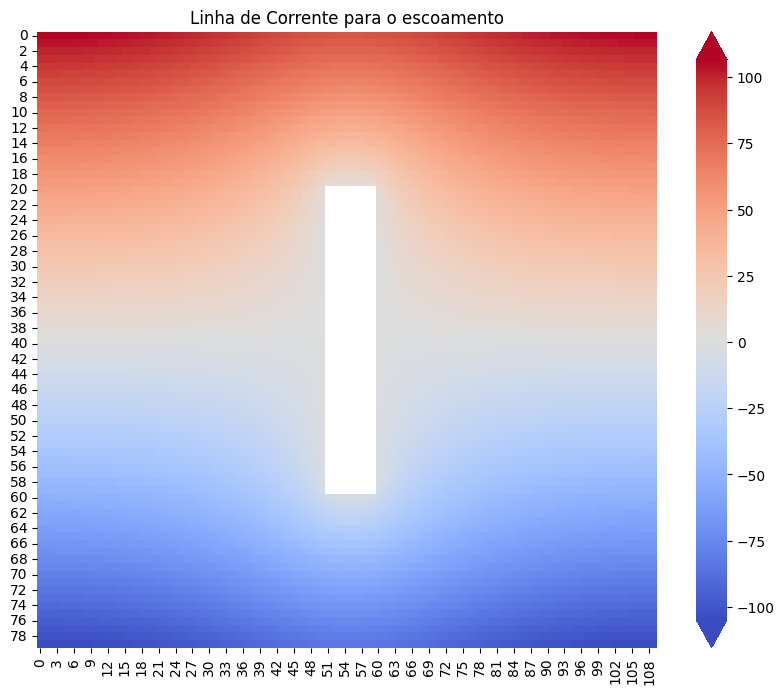

In [43]:
def plot_streamline(self): 
    mesh_values = self.get_mesh_values()
    plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura
    sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0)
    plt.show()
    
import matplotlib.pyplot as plt
import seaborn as sns

def plot_streamline(self):
    mesh_values = self.get_mesh_values()  # Supondo que esta função retorna uma matriz de valores
    mesh_values = np.array(mesh_values)
    
    # Definindo a escala de cores personalizada
    cmap = plt.cm.coolwarm  # Escolha de cmap inicial
    cmap.set_under('black')  # Define a cor 'black' para valores abaixo do limite mínimo

    # Plotando o heatmap
    plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura
    sns.heatmap(mesh_values, annot=False, cmap=cmap, linewidths=0, vmin=mesh_values.min(), vmax=mesh_values.max())

    plt.title('Heatmap com Zero em Preto')  # Adicione um título
    plt.xlabel('Eixo X')  # Adicione um rótulo ao eixo X
    plt.ylabel('Eixo Y')  # Adicione um rótulo ao eixo Y

    plt.show()  # Mostra o heatmap com a personalização

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_streamline(self):
    mesh_values = self.get_mesh_values()  
    mesh_values = np.array(mesh_values)
    mask = np.zeros_like(mesh_values, dtype=bool)
    mask[mesh_values == 0] = True
    plt.figure(figsize=(10, 8))
    sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=mask, cbar_kws={'extend': 'both'})
    plt.title('Linha de Corrente para o Escoamento')  # Título do gráfico
    plt.show() 


plot_streamline(m)

In [40]:
sum(np.array(m.get_mesh_values())==0)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       40, 40, 40, 40, 40, 40, 40, 40, 40,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

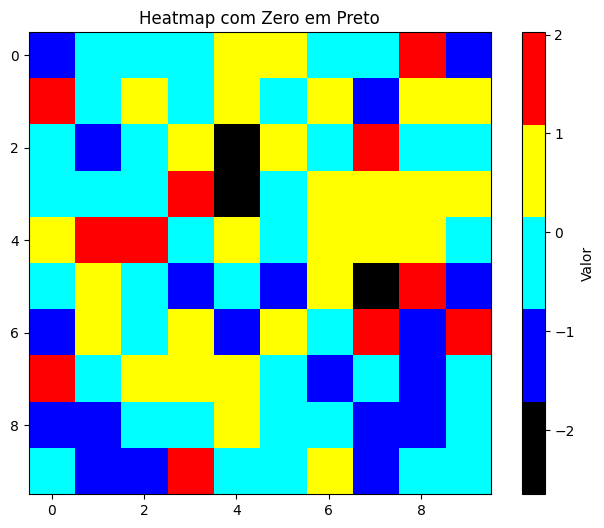

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Criando uma matriz de exemplo
data = np.random.randn(10, 10)  # Matriz de números aleatórios

# Definindo a escala de cores personalizada
colors = ['black', 'blue', 'cyan', 'yellow', 'red']  # Cores para os valores negativos, zero, e positivos
cmap = mcolors.ListedColormap(colors)

# Plotando o heatmap
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap=cmap, interpolation='nearest')

# Adicionando uma barra de cores para referência
plt.colorbar(label='Valor')

plt.title('Heatmap com Zero em Preto')
plt.show()


(80, 110)


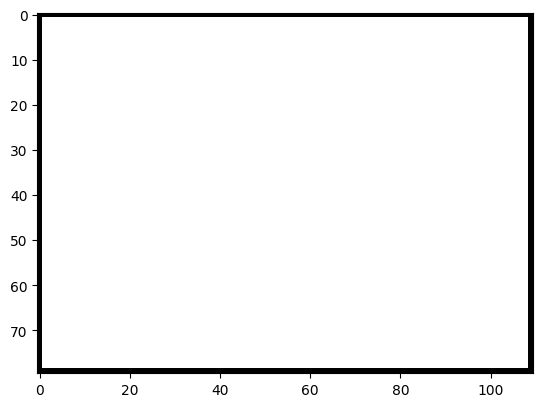

In [22]:

def plot_mesh(self):
    num_of_cols = len(self.mesh[0])    
    num_of_rows = len(self.mesh)    
    mesh = [[None]*num_of_cols for _ in range(num_of_rows)]
    for r in range(num_of_rows):
        for c in range(num_of_cols):
            point = self.mesh[r][c]
            mesh[r][c] = not point.is_border
    print(np.array(mesh).shape)
    plt.imshow(mesh, cmap='gray', interpolation='nearest')

    plt.show()
plot_mesh(m)
    

